# Intro to Linear Regression

1. Basics from scratch:

- We'll start with ordinary least squares
- Then we'll apply gradient descent and generalize to multiple linear regression
- Batch gradient descent, stochastic gradient descent, and mini-batch gradient descent
- Ridge and Lasso regularization (plus elastic net regularization)

2. Then:

- Regression with scikit-learn
- Including polynomial features

3. Next time: On to Logistic Regression!


Suppose we have a regression of the form:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
$$

- $\hat{y}$ $=$ predicted values

- $n$ $=$ Number of features

- $x_i$ $=$ $i$th feature

- $\theta_j$ $=$ $j$th model parameter, where $\theta_0$ is also known as the bias term and $\theta_1, ..., \theta_n$ are the the feature weights


We can write this in vector form:

$$
\hat{y} = h_{\theta}(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x} = \mathbf{\theta}^T\mathbf{x}
$$

where

$$
\mathbf{\theta} =
\begin{pmatrix}
\theta_0 \\
\vdots \\
\theta_n
\end{pmatrix}
, \, \,
\mathbf{x} =
\begin{pmatrix}
x_0 \\
\vdots \\
x_n
\end{pmatrix},
$$

and we fix $x_0 = 1$.

$h_{\theta}(\mathbf{x})$ is called the "hypothesis function."  We can take our mean squared error (MSE) as a function of $\mathbf{\theta}$:

$$
\text{MSE}(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^m \left(\mathbf{\theta}^T\mathbf{x}^{(i)} - y^{(i)}\right)^2
$$

Now, constructing the matrix $X$ as

$$
X =
\begin{pmatrix}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & ... & x_n^{(1)}\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
x_0^{(m)} & x_1^{(m)} & x_2^{(m)} & ... & x_n^{(m)}
\end{pmatrix}
$$

we put our regression equation in matrix-vector form:

$$
\mathbf{y} = X \mathbf{\theta} + \mathbf{\epsilon},
$$

and we can estimate $\mathbf{\theta}$, or $\mathbf{\hat{\theta}}$, using the **normal equations**:

$$
\mathbf{\hat{\theta}} = (X^T X)^{-1} X^T \mathbf{y},
$$

Let's do it!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

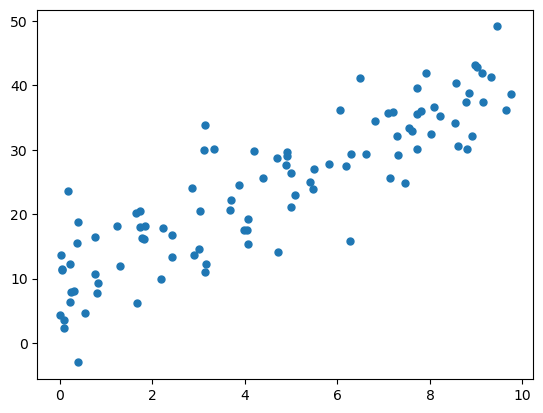

In [2]:
#Create a matrix of regressors:
######

#First, let's create some random points for testing purposes:
N = 100

#Random points between 0 and 10, sorted:
x = np.random.uniform(0, 10, N)
x.sort()

#Linear equation:
y = 3*x + 10 + np.random.normal(loc=0, scale=5, size=N)

#Plot our data:
plt.plot(x, y, 'o', markersize=5);

In [3]:
## Now make the matrix X:
######

X = np.c_[np.ones((N,1)), x]

#Can add a bunch of polynomial terms:
#X = np.c_[np.ones((N,1)), x, x**2, x**3]

#Or:
#X = np.hstack((np.ones((N,)), x))

#Check our work:
#X

In [4]:
#And estimate theta:

#(X^T X)^{-1} X^T
matrix = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)

#And multiply: (X^T X)^{-1} X^T y
theta_est = np.dot(matrix, y)

theta_est

array([9.2236116 , 3.22963196])

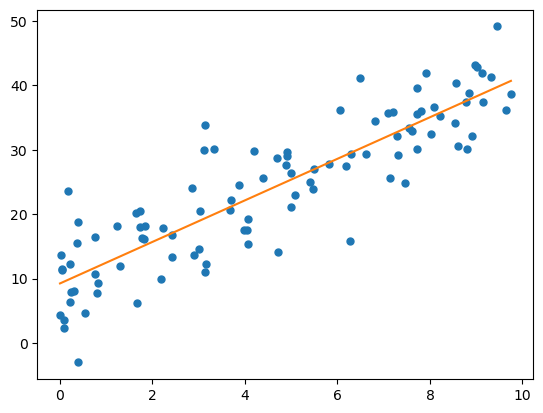

In [5]:
#Check our prediction:

y_hat = theta_est[0] + theta_est[1]*x

plt.plot(x, y, 'o', markersize=5)
plt.plot(x, y_hat);

In [6]:
#Note, we could also use the Moore-Penrose psuedoinverse:

p_inv = np.linalg.pinv(X)
theta_est = np.dot(p_inv, y)

theta_est

array([9.2236116 , 3.22963196])

## Gradient Descent for linear regression

First consider the regression

$$
\hat{y} = \theta_0 x_0 + \theta_1 x_1
$$

where $x_0 = 1$.

Let us make our error (or cost) function the mean square error:

$$
E = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)^2,
$$

or

$$
E = \frac{1}{m} \sum_{i=1}^m \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right)^2,
$$

We need our gradient vector to run the gradient descend method. So, taking partial derivatives, we get

$$
\frac{\partial E}{\partial \theta_0} = \frac{2}{m} \sum_{i=1}^m \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right),
$$

$$
\frac{\partial E}{\partial \theta_1} = \frac{2}{m} \sum_{i=1}^m \left( \theta_0 + \theta_1 x_1^{(i)} - y^{(i)} \right) x_1^{(i)},
$$

We can re-write these as

$$
\frac{\partial E}{\partial \theta_0} = \frac{2}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right),
$$

$$
\frac{\partial E}{\partial \theta_1} = \frac{2}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right) x_1^{(i)},
$$

Let's implement our gradient descent method, running for 10,000 iterations, using the above expressions.

Recall that we will use, for each component $\theta_j$,

$$
\theta_{j}^{(\text{next})} = \theta_{j} - \alpha \frac{\partial E (\theta_j)}{\partial \theta_j}.
$$

The results are given below:

In [7]:
## Simple implementation for y = theta_0 + theta_1 * x
########

#Recall:
#X = np.c_[np.ones((N,1)), x]

#And y is given

#Get our length:
m = len(y)

#Initial guess:
theta = [1, 1]

num_iters = 10000

alpha = .01

for k in range(num_iters):
    
    #Get our predictions for current value of theta
    y_hat = theta[0] + theta[1] * x
    
    #Get partial derivatives with respect to theta_0 and theta_1:
    dE_theta0 = 2 / m * np.sum(y_hat - y)
    
    dE_theta1 = 2 / m * np.dot((y_hat - y).T, x)
    
    
    #Update theta:
    theta = theta - alpha * np.array([dE_theta0, dE_theta1])
    
    #Could print theta each iteration
    #print(theta)

[9.2236116  3.22963196]


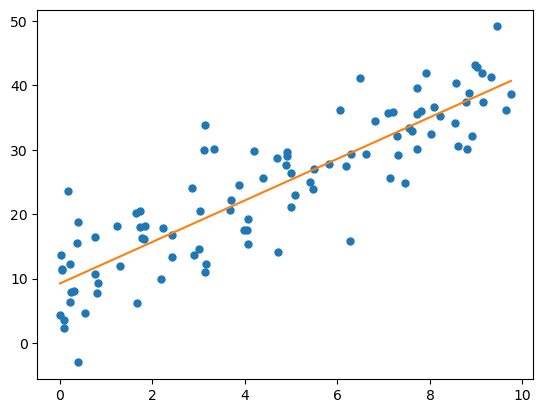

In [8]:
#Print result
#heck our prediction once again:

print(theta)

y_hat = theta[0] + theta[1]*x

plt.plot(x, y, 'o', markersize=5)
plt.plot(x, y_hat);

### Let's Generalize...

Now consider the regression

$$
\hat{y} = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
$$

where $x_0 = 1$.

Again, let our error (or cost) function be the mean square error:

$$
E = \frac{1}{m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right),
$$

Now let us write this using vector notation:

$$
E = \frac{1}{m} \sum_{i=1}^m \left( \mathbf{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right)^2,
$$

From our work above, we can extend to get the general pattern for the partial derivative w.r.t. $\theta_j$, as

$$
\frac{\partial E}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m \left( \mathbf{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)},
$$

noting again that $x_0 = 1$ everywhere.

We can write out our vector of partial derivatives:

$$
\nabla_{\mathbf{\theta}}E(\mathbf{\theta}) = 
\begin{pmatrix}
\frac{\partial E(\mathbf{\theta})}{\partial \theta_0} \\
\vdots \\
\frac{\partial E(\mathbf{\theta})}{\partial \theta_n}
\end{pmatrix}.
$$

Finally, we can write this vector of partial derivatives in matrix-vector form as:

$$
\nabla_{\mathbf{\theta}}E(\mathbf{\theta}) = \frac{2}{m} X^T (X \mathbf{\theta} - \mathbf{y})
$$

We can rewrite our gradient descent method using vectors:

$$
\mathbf{\theta}^{(\text{next})} = \mathbf{\theta} - \alpha \nabla_{\mathbf{\theta}}E(\mathbf{\theta}).
$$


Let's re-implement using these notions...

In [9]:
## Simple implementation for y = theta_0 + theta_1 * x

#Recall:
#X = np.c_[np.ones((N,1)), x]

#And y is given
#But need to reshape to N by 1
y = y.reshape(N,1)

#Get our length:
m = len(y)

#Initial guess:
theta = np.array([1, 1])

#Reshape to 2 by 1
theta = theta.reshape(2,1)


num_iters = 10000

alpha = .01

for k in range(num_iters):
    
    #Get our gradient vector:
    grad_vector = 2 / m * (X.T).dot((np.dot(X, theta) - y))
    
    #Update theta:
    theta = theta - alpha * grad_vector
    
theta

array([[9.2236116 ],
       [3.22963196]])

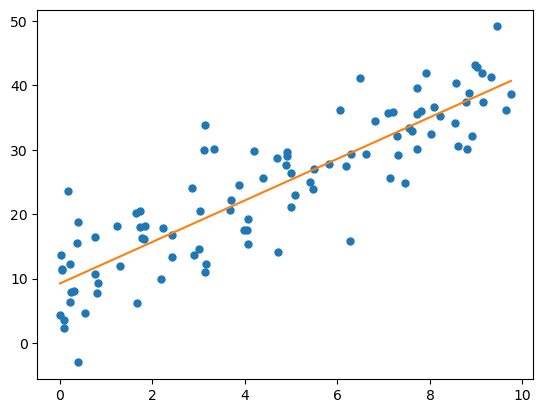

In [10]:
#And check our prediction yet again:

y_hat = theta[0] + theta[1]*x

plt.plot(x, y, 'o', markersize=5)
plt.plot(x, y_hat)

## Multiple linear regression

Let's do some polynomials...

Consider the following example data:

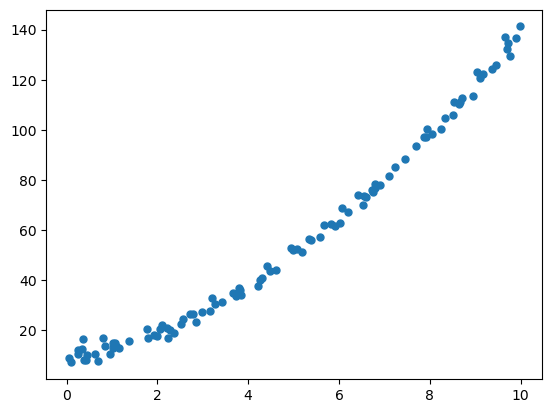

In [11]:
## Make new data
######

N = 100

#Random points between 0 and 10, sorted:
x = np.random.uniform(0, 10, N)
x.sort()

#Linear equation:
y = 3*x + x**2 + 10 + np.random.normal(loc=0, scale=2, size=N)

#Plot:
plt.plot(x, y, 'o', markersize=5);


#### And a simple implementation...  {-}

In [12]:
#And just copy/paste
# (Obviously would be better to do as a function longer-term)

#Make a matrix with polynomial terms:
#How many polynomial terms?
degree = 2

X = np.ones((N,1))

for k in range(1, degree+1):
    X = np.hstack((X, np.array(x**k).reshape(N,1)))

#Reshape y to N by 1
y = y.reshape(N,1)

#Get our length:
m = len(y)


#Initial guess:
theta = np.ones([degree+1, 1])*10


num_iters = 10000

alpha = .0001

for k in range(num_iters):
    
    #Get our gradient vector:
    grad_vector = 2 / m * (X.T).dot((np.dot(X, theta) - y))
    
    #Update theta:
    theta = theta - alpha * grad_vector
    
theta

array([[7.95076386],
       [3.89725219],
       [0.92569228]])

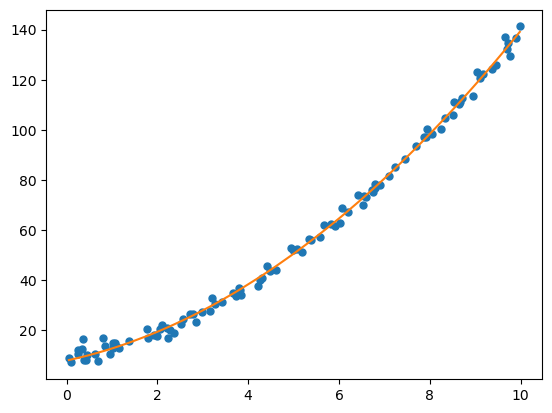

In [13]:
y_hat = theta[0] + theta[1]*x + theta[2]*x**2 #+ theta[3]*x**3

plt.plot(x, y, 'o', markersize=5)
plt.plot(x, y_hat);

## Error surface and parameter trajectory

Let's visualize our error surface for a simple linear regression problem, and see how our estimate of $\theta$ changes

In [14]:
N = 100
x = np.random.uniform(0, 1, N)
x.sort()

#Linear equation:
y = .5*x + .75 + np.random.normal(loc=0, scale=.1, size=N)


#Will just do a linear function:
#Get MSE:
def MSE(theta_0, theta_1, x1, y1):
    y_hat = theta_0 + theta_1 * x1
    
    mse = np.sum((y_hat - y1)**2)
    return mse
    
NE = 50

E = np.zeros([NE, NE])
XE = np.zeros([NE, NE])
YE = np.zeros([NE, NE])

theta_0_vals = np.linspace(0,1,NE)
theta_1_vals = np.linspace(0,1,NE)

for k in range(len(theta_0_vals)):
    for q in range(len(theta_1_vals)):
        E[k,q] = MSE(theta_0_vals[k], theta_1_vals[q], x, y)
        XE[k,q] = theta_0_vals[k]
        YE[k,q] = theta_1_vals[q]


In [15]:
#Run Gradient descent again:
####
## Simple implementation for y = theta_0 + theta_1 * x

y = y.reshape(N,1)
X = np.c_[np.ones((N,1)), x]

#Get our length:
m = len(y)

#Initial guess:
theta = np.array([.1, .7])

#Reshape to 2 by 1
theta = theta.reshape(2,1)


num_iters = 1000

alpha = .05

theta0_hx = list(theta[0])
theta1_hx = list(theta[1])

dtheta0_hx = [0]
dtheta1_hx = [1]

for k in range(num_iters):
    
    #Get our gradient vector:
    grad_vector = 2 / m * (X.T).dot((np.dot(X, theta) - y))
    
    #Update theta:
    theta = theta - alpha * grad_vector
    
    theta0_hx.extend(theta[0])
    theta1_hx.extend(theta[1])
    
    dtheta0_hx.extend(-alpha*grad_vector[0])
    dtheta1_hx.extend(-alpha*grad_vector[1])
        
#theta


C:\Users\steff\AppData\Local\Temp\ipykernel_21992\493276980.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('jet_r', num_iters)


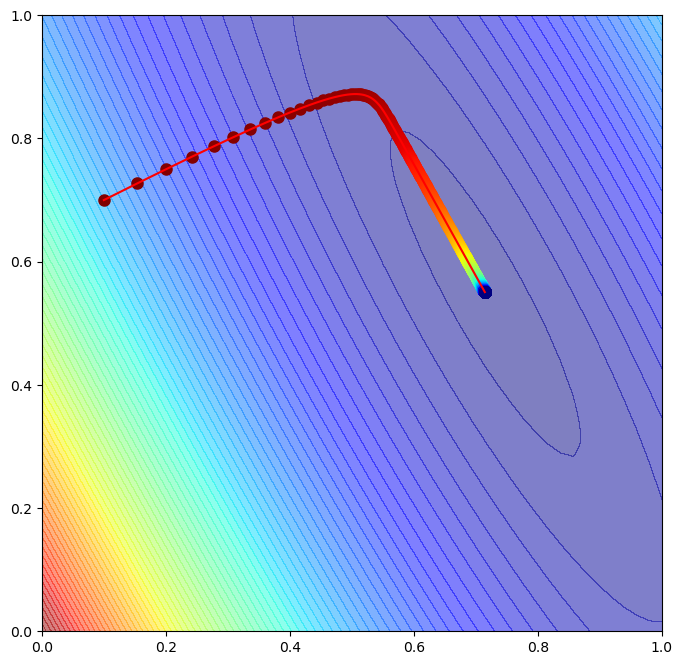

In [16]:
from matplotlib import cm

fig1, ax1 = plt.subplots(1, 1, figsize=(8,8))
ax1.contourf(XE, YE, E, 100, cmap='jet', alpha=.5)

my_cmap = cm.get_cmap('jet_r', num_iters)

for k in range(num_iters):
    ax1.plot(theta0_hx[k], theta1_hx[k], 'o', color=my_cmap(k), markersize=8)
    
ax1.plot(theta0_hx, theta1_hx, color='red');

#for k in range(len(theta0_hx)-1):
#    ax1.arrow(theta0_hx[k], theta1_hx[k], dtheta0_hx[k]*.75, dtheta1_hx[k]*.75, width=.01, head_width=.1, head_length=.01, linewidth=.1,
#              color=my_cmap(k)) #, overhang=.5) #joinstyle="bevel")
    

## Stochastic Gradient Descent

In the stochastic gradient descent, we use only a single data-point to calculate our error at each step.  That is, instead of using all $m$ datapoints and taking the sum of squared errors, we get the error using a single $\mathbf{x}^{(i)}$, where $i$ is randomly selected each iteration of the method.

- We train in **epochs**: We select $m$ values each epoch (can choose either with or without replacement)

- We can implement as follows:

In [17]:
#Run Stochastic Gradient Descent
####
## Simple implementation for y = theta_0 + theta_1 * x

y = y.reshape(N,1)
X = np.c_[np.ones((N,1)), x]

#Get our length:
m = len(y)

#Initial guess:
theta = np.array([.25, .8])

#Reshape to 2 by 1
theta = theta.reshape(2,1)


num_epochs = 50

alpha = .01

theta0_hx = list(theta[0])
theta1_hx = list(theta[1])

dtheta0_hx = [0]
dtheta1_hx = [1]

counter = 0
for epoch in range(num_epochs):
    for i in range(m):
    
        #Get a random index:
        index = np.random.randint(m)
        
        xi = X[index:index + 1]
        yi = y[index]
        
        #Get our gradient vector:
        grad_vector = 2 / 1 * (xi.T).dot((np.dot(xi, theta) - yi))

        #Update theta:
        theta = theta - alpha * grad_vector

        theta0_hx.extend(theta[0])
        theta1_hx.extend(theta[1])

        dtheta0_hx.extend(-alpha*grad_vector[0])
        dtheta1_hx.extend(-alpha*grad_vector[1])
        
        counter += 1
theta


array([[0.70035908],
       [0.5371213 ]])

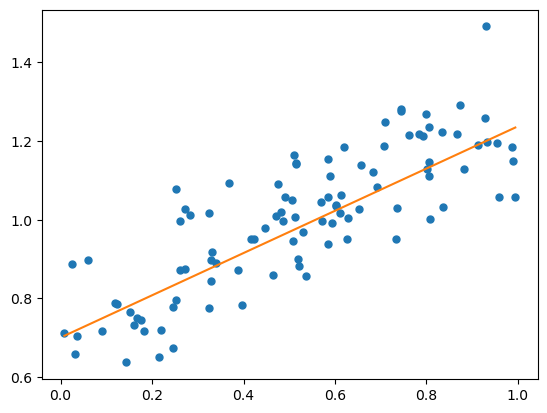

In [18]:
#And check our prediction yet again:

y_hat = theta[0] + theta[1]*x

plt.plot(x, y, 'o', markersize=5)
plt.plot(x, y_hat)

C:\Users\steff\AppData\Local\Temp\ipykernel_21992\131918599.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('jet_r', num_iters)


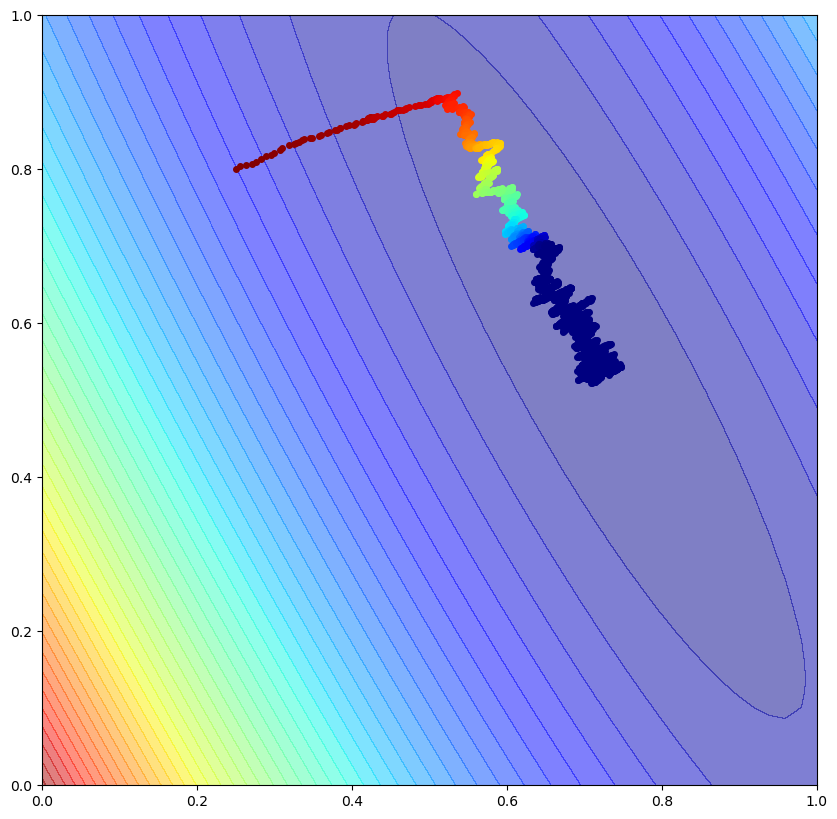

In [19]:
fig1, ax1 = plt.subplots(1, 1, figsize=(10,10))
ax1.contourf(XE, YE, E, 50, cmap='jet', alpha=.5)

my_cmap = cm.get_cmap('jet_r', num_iters)

for k in range(num_epochs * m):
    ax1.plot(theta0_hx[k], theta1_hx[k], 'o', color=my_cmap(k), markersize=4)


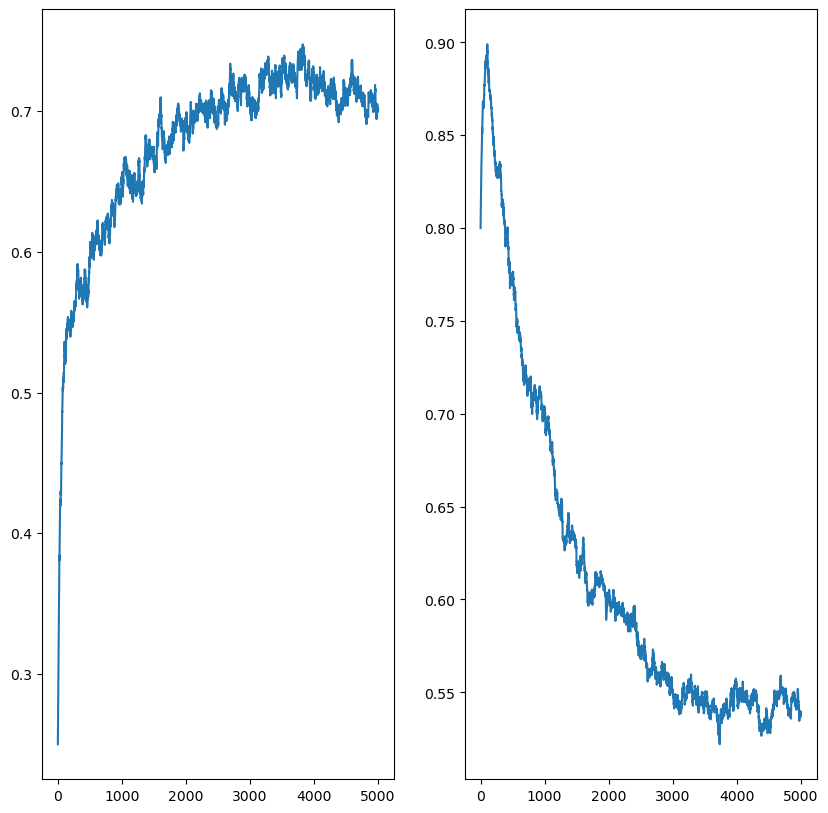

In [20]:
#Evolution of parameter estimates
###########

fig1, ax1 = plt.subplots(1, 2, figsize=(10,10))

ax1[0].plot(theta0_hx)
ax1[1].plot(theta1_hx)

### Add a learning schedule

- We can modify the above to decrease $\alpha$ over time...

- Also, let's throw in **mini-batch** gradient descent

In [21]:
#Run Stochastic Gradient Descent
####
## Simple implementation for y = theta_0 + theta_1 * x

y = y.reshape(N,1)
X = np.c_[np.ones((N,1)), x]

#Get our length:
m = len(y)

#Initial guess:
theta = np.array([.25, .8])

#Reshape to 2 by 1
theta = theta.reshape(2,1)


num_epochs = 300

alpha = .01

theta0_hx = list(theta[0])
theta1_hx = list(theta[1])

dtheta0_hx = [0]
dtheta1_hx = [1]

counter = 0
for epoch in range(num_epochs):
    for i in range(10):
    
        #Try with and without learning schedule
        alpha = .01 / (1 + counter/250)
        #Get a random index:
        index = np.random.choice(m, size=10, replace=False)
        
        xi = X[index]
        yi = y[index]
        
        #Get our gradient vector:
        grad_vector = 2 / 1 * (xi.T).dot((np.dot(xi, theta) - yi))

        #Update theta:
        theta = theta - alpha * grad_vector

        theta0_hx.extend(theta[0])
        theta1_hx.extend(theta[1])

        dtheta0_hx.extend(-alpha*grad_vector[0])
        dtheta1_hx.extend(-alpha*grad_vector[1])
        
        counter += 1
theta


array([[0.71643634],
       [0.54645208]])

C:\Users\steff\AppData\Local\Temp\ipykernel_21992\718338305.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('jet_r', num_iters)


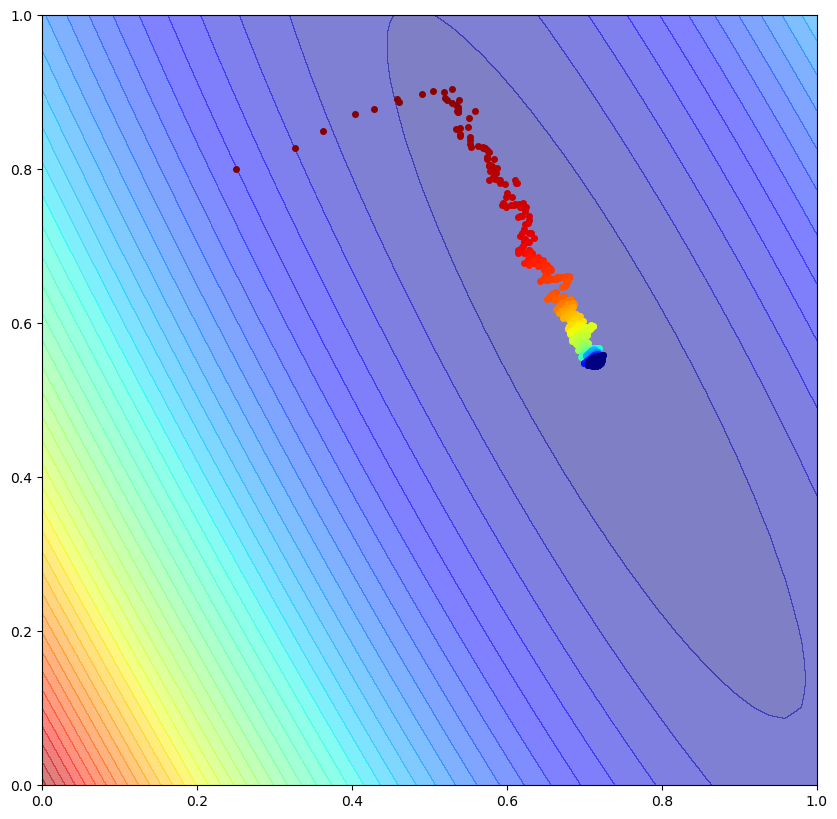

In [22]:
fig1, ax1 = plt.subplots(1, 1, figsize=(10,10))
ax1.contourf(XE, YE, E, 50, cmap='jet', alpha=.5)

my_cmap = cm.get_cmap('jet_r', num_iters)

for k in range(counter):
    ax1.plot(theta0_hx[k], theta1_hx[k], 'o', color=my_cmap(k), markersize=4)
    
#ax1.plot(theta0_hx, theta1_hx, color='red')

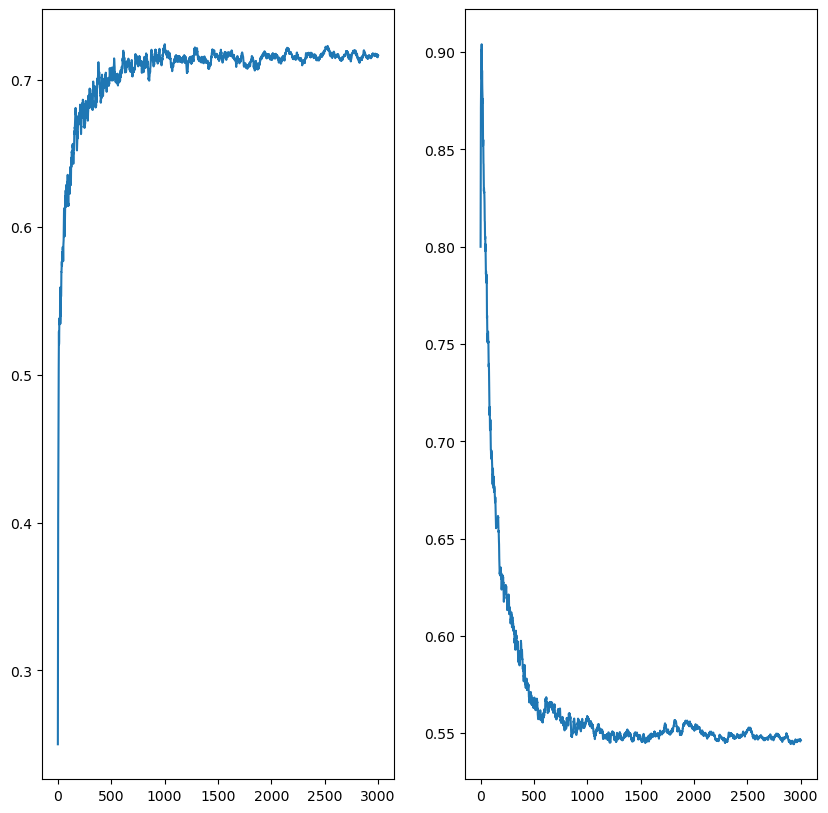

In [23]:
#And evolution of parameters?
###

fig1, ax1 = plt.subplots(1, 2, figsize=(10,10))

ax1[0].plot(theta0_hx)
ax1[1].plot(theta1_hx)

# Regularization

We generally wish to avoid overfitting, or fitting to noise. Regularization is the general term for imposing penalties, etc. to try to restrict avoid overfitting/extreme parameter estimates. We often regularize by adding penalty terms to our error function.

- Note that we need to re-scale our features when we use regularization!
- Vanilla linear regression does not require rescaling (although it can expedite gradient descent)

Our basic methods follow:

## Ridge Regression (Tokhonov regularization) 

In linear regression, we add the sum of our parameters squared to our error/cost function as follows:

$$
E(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + \frac{\lambda}{m} \sum_{i=1}^n \theta_i^2 = \frac{1}{m} \left(\sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)^2 + \lambda \sum_{i=1}^n \theta_i^2 \right)
$$

*Note that $\theta_0$, the bias term, is not regularized.* The regularization term represents the "length" (or norm) of our weight vector. The norm is the so-called L2 norm, and so this is also referred to as L2 regularization.

The hyperparameter $\lambda$ controls the strength of regularization. If $\lambda = 0$, we reduce to regular linear regression, and as $\lambda$ gets large, the model will tend toward simply being the $\theta_0$ bias term, and all variation is washed out.

Thus, regularization helps tune our "bias-variance" tradeoff.

The normal equations are given as

$$
\mathbf{\hat{\theta}} = (X^T X + \lambda I)^{-1} X^T \mathbf{y},
$$

where $I$ is the identity matrix (and hence the term "ridge" regression: we have a ridge of 1s down the diagonal of the identity matrix). We also set the upper left term of $I$ to $0$, to avoid regularizing $\theta_0$ away.


#### Incorporate into Gradient Descent

The penalty term can also be incorportated into gradient descent method in a straightforward manner. We have simply:


$$
\frac{\partial}{\partial \theta_j} \frac{1}{m} \lambda \sum_{i=1}^n \theta_i^2 = \frac{2}{m} \lambda \theta_j
$$

From above, we get the following expression for the error gradient, for $j = 1, 2, ...$:

$$
\frac{\partial E}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m \left( \mathbf{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)} + \frac{2}{m} \lambda \theta_j,
$$

Finally, we can write this vector of partial derivatives in matrix-vector form as:

$$
\nabla_{\mathbf{\theta}}E(\mathbf{\theta}) = \frac{2}{m} \left(X^T (X \mathbf{\theta} - \mathbf{y}) + \lambda \tilde{\mathbf{\theta}}\right),
$$

where

$$
\tilde{\mathbf{\theta}} = 
\begin{pmatrix}
0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix}
$$

And recall our gradient descent method using vectors:

$$
\mathbf{\theta}^{(\text{next})} = \mathbf{\theta} - \alpha \nabla_{\mathbf{\theta}}E(\mathbf{\theta}).
$$

## LASSO Regression 

LASSO or Lasso regression uses the sum of the absolute values of the model parameters as the regularization/penalty term:

$$
E(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + \lambda \sum_{i=1}^n |\theta_i|
$$

We modify our gradient descent as follows. Note that
$$
\frac{\partial}{\partial \theta_j} \lambda \sum_{i=1}^n |\theta_j| = \lambda \frac{\theta_j}{|\theta_j|}
$$

From above, we get the following expression for the error gradient, for $j = 1, 2, ...$:

$$
\frac{\partial E}{\partial \theta_j} = \frac{2}{m} \sum_{i=1}^m \left( \mathbf{\theta}^T \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)} + \lambda \frac{\theta_j}{|\theta_j|}
$$


## Elastic Net Regularization 

Elastic Net regularization is simply a combination of Ridge and Lasso regularization, with our cost function

$$
E(\mathbf{\theta}) = \text{MSE}(\mathbf{\theta}) + r \lambda \sum_{i=1}^n |\theta_i| + (1-r) \lambda \sum_{i=1}^n \theta_i^2,
$$

with $r \in [0, 1]$. If $r = 0$, we reduce to Ridge regularization, and if $r = 1$ we recover Lasso regularization.

### Note the factors

- Note that some sources have a $1/m$ factor for the Lasso regularization term as well. It is also common to divide MSE by $2$. It makes no essential difference, but be careful!

Scikit-Learn uses the following objective functions:

1. Ridge

```
||y - Xw||^2_2 + alpha * ||w||^2_2
```

2. Lasso

```
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
```

3. Elastic Net

```
1 / (2 * n_samples) * ||y - Xw||^2_2
+ alpha * l1_ratio * ||w||_1
+ 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
```

## Let's Implement Ridge Regression:

As follows...

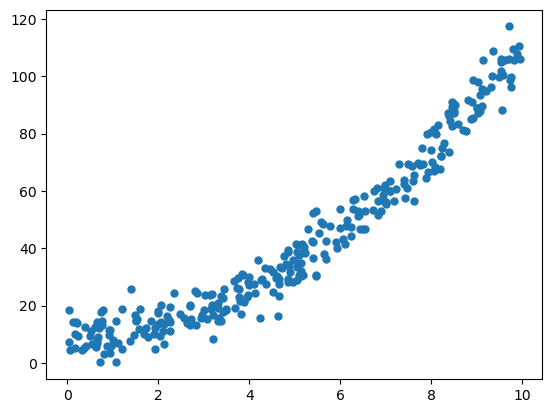

In [24]:
#Recreate data:
N = 300

#Random points between 0 and 10, sorted:
x = np.random.uniform(0, 10, N)
x.sort()

#Nonlinear equation:
y = 1*x**2 + 10 + np.random.normal(loc=0, scale=5, size=N)

#Plot our data:
plt.plot(x, y, 'o', markersize=5);

In [25]:
#Make a matrix with polynomial terms:
degree = 2

X = np.ones((N,1))

for k in range(1, degree+1):
    X = np.hstack((X, np.array(x**k).reshape(N,1)))


#And y is given
#But need to reshape to N by 1
y = y.reshape(N,1)

array([[9.44209421],
       [0.08200595],
       [1.00029259]])

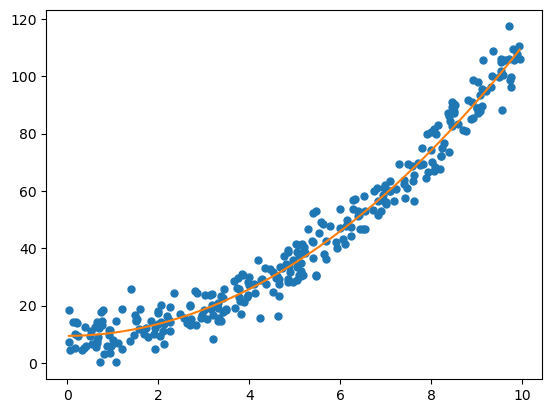

In [26]:
#And estimate theta:
#Use the normal equations:
#####

eta = 1000

reg_term = eta*np.eye(3)
reg_term[0,0] = 0

#(X^T X)^{-1} X^T
matrix = np.dot(np.linalg.inv(np.dot(X.T, X) + reg_term), X.T) 

#And multiply: (X^T X)^{-1} X^T y
theta = np.dot(matrix, y)

y_hat = theta[0] + theta[1]*x + theta[2]*x**2

plt.plot(x, y, 'o', markersize=5)
plt.plot(x, y_hat);

theta

In [27]:
#Get our length:
m = len(y)

#Initial guess:
theta = np.array(np.ones(degree + 1))

#Reshape to 2 by 1
theta = theta.reshape(degree + 1,1)


num_iters = 100000

alpha = .0001

#Add regularization:
eta = 1000

#Make theta_tilde
theta_tilde = np.ones_like(theta)
theta_tilde[0] = 0
    
for k in range(num_iters):    
    
    #Get our gradient vector:
    grad_vector = 2 / m * (X.T).dot((np.dot(X, theta) - y)) + theta_tilde*theta*eta*2/m
    
    #Update theta:
    theta = theta - alpha * grad_vector
    
theta

array([[9.42520238],
       [0.08475095],
       [1.00023229]])

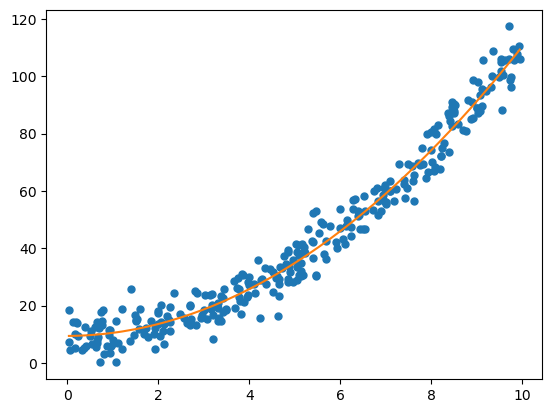

In [28]:
y_hat = theta[0] + theta[1]*x + theta[2]*x**2

plt.plot(x, y, 'o', markersize=5)
plt.plot(x, y_hat);

In [29]:
#Compare to Scikit-Learn Ridge:
#####
from sklearn.linear_model import Ridge

#Recall that fit() returns self
model = Ridge(alpha=1000, fit_intercept=True).fit(X, y) 

print(model.intercept_)
model.coef_


[9.44209421]


array([[0.        , 0.08200595, 1.00029259]])

## And Implement Lasso...

In [30]:
#Get our length:
m = len(y)

#Initial guess:
theta = np.array(np.ones(degree + 1))

#Reshape to 2 by 1
theta = theta.reshape(degree + 1,1)


num_iters = 100000

alpha = .0001

#Add regularization:
eta = 100

#Make theta_tilde
theta_tilde = np.ones_like(theta)
theta_tilde[0] = 0
    
for k in range(num_iters):    
    
    #Get our gradient vector:
    #Note we use 1/m to be comparable to Scikit-Learn Lasso:
    grad_vector = 1 / m * (X.T).dot((np.dot(X, theta) - y)) + theta_tilde*np.sign(theta)*eta #*2/m
    
    #Update theta:
    theta = theta - alpha * grad_vector
    
theta

array([[ 1.30940598e+01],
       [-2.22666271e-03],
       [ 8.99748687e-01]])

In [31]:
#Compare to Scikit-Learn Lasso:
#####
from sklearn.linear_model import Lasso

#Recall that fit() returns self
model = Lasso(alpha=100, fit_intercept=True).fit(X, y) 

print(model.intercept_)
model.coef_

[13.23743287]


array([0.        , 0.        , 0.89747842])

# Regression in Scikit-Learn


In [32]:
#Go ahead and import:
from sklearn.linear_model import LinearRegression

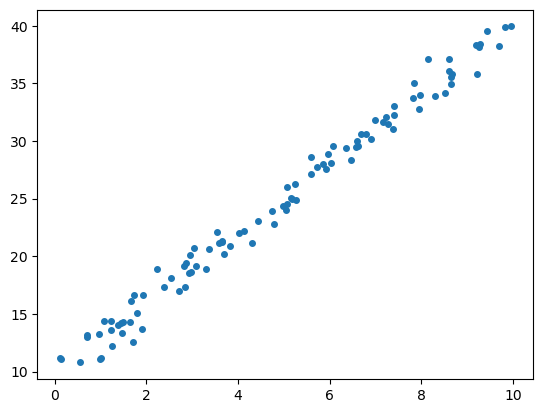

In [33]:
#Once more create some random data, and fit a model:
N = 100

#Random points between 0 and 10, sorted:
x = np.random.uniform(0, 10, N)
x.sort()

y = 3*x + 10 + np.random.normal(loc=0, scale=1, size=N)

#Plot our "data" once again:
plt.plot(x, y, 'o', markersize='4');



In [34]:
#Now fit the model
#######

#Note, we need to reshape x:
print(x.shape)

x = x.reshape((N, 1))

print(x.shape)
 
#The fit:
model = LinearRegression().fit(x, y) 

(100,)
(100, 1)


In [35]:
#Get R^2:
model.score(x,y)

0.9865639985937948

In [36]:
#Get our intercept:
model.intercept_

9.917848287702745

In [37]:
#And coefficients:
model.coef_

array([3.01789368])

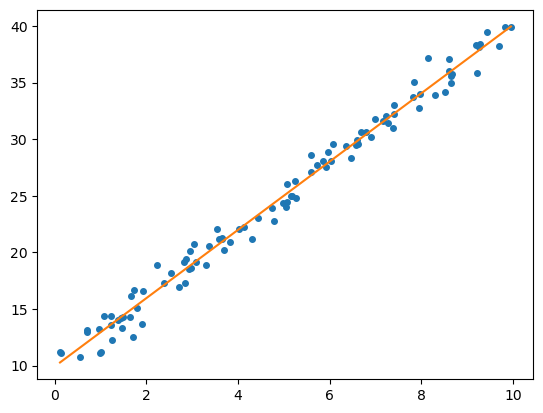

In [38]:
#Now, create a prediction
#And plot:
y_pred = model.predict(x)

#Plot our data once again, but with our prediction:
plt.plot(x, y, 'o', markersize='4')
plt.plot(x, y_pred);

## Ridge, Lasso, and Elastic Net with scikit-learn

We already saw above, but just to recap...

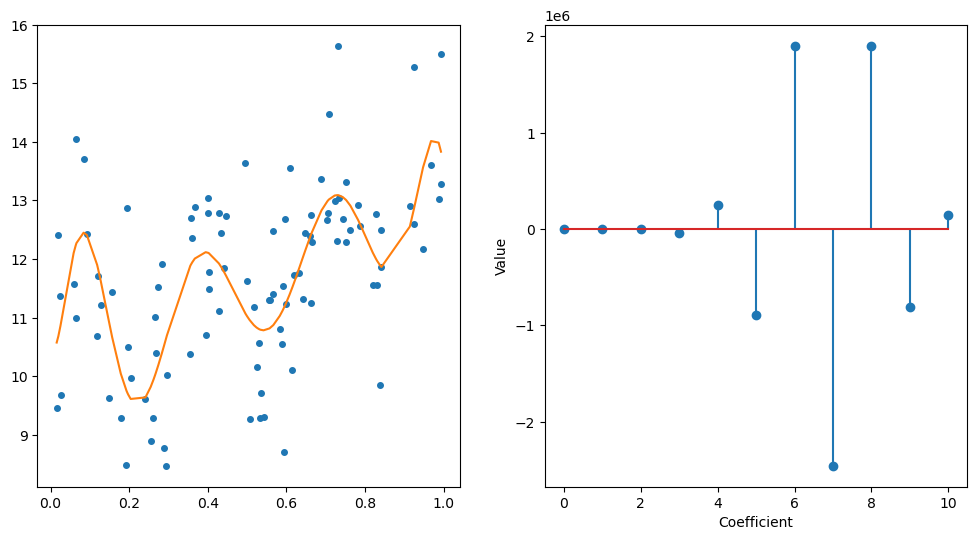

In [39]:
#Let's add a bunch of polynomial terms to our model
#Then fit to noise with and without regularization

N = 100

x = np.random.uniform(0, 1, N)
x.sort()
y = 3*x + .05*x**2 + .4*x**3 + np.sin(x*20) + 10 + np.random.normal(loc=0, scale=1, size=N)
x = x.reshape((-1,1))


#Can add a bunch of polynomial terms:
X = np.c_[x, x**2, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10]

#The fit:
model = LinearRegression().fit(X, y) 

#The prediction:
y_pred = model.predict(X)

#Plot prediction and coefficients:
fig, ax1 = plt.subplots(1, 2, figsize=(12,6))

ax1[0].plot(x, y, 'o', markersize='4')
ax1[0].plot(x, y_pred)

ax1[1].stem(model.coef_);
ax1[1].set_xlabel('Coefficient')
ax1[1].set_ylabel('Value');

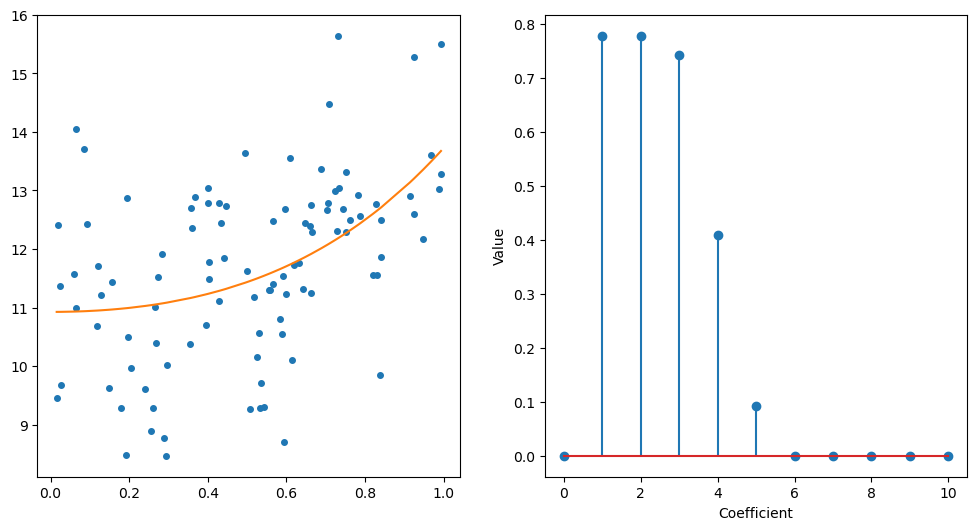

In [40]:
#Ridge, Lasso, or ElasticNet Regression:
#####
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#Can set solver for Ridge:
#solver{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’

#model = Ridge(alpha=.001).fit(X, y) 
#model = Lasso(alpha=.01).fit(X, y) 
model = ElasticNet(alpha=.01).fit(X, y) 

#The prediction:
y_pred = model.predict(X)

#Plot prediction and coefficients:
fig, ax1 = plt.subplots(1, 2, figsize=(12,6))

ax1[0].plot(x, y, 'o', markersize='4')
ax1[0].plot(x, y_pred)

ax1[1].stem(model.coef_);
ax1[1].set_xlabel('Coefficient')
ax1[1].set_ylabel('Value');

## Polynomial Features

- We can use Scikit-Learn's `PolynomialFeatures` to generate higher-order polynomials
- Example with 1 or 2 features:

In [41]:
from sklearn.preprocessing import PolynomialFeatures

N = 10
a = np.random.uniform(0, 1, N).round(2)
b = np.random.uniform(0, 1, N).round(2)

poly_features = PolynomialFeatures(degree=3, include_bias=False)

#Third-order features for single feature
X_poly = poly_features.fit_transform(a.reshape(-1,1))
X_poly

array([[0.23    , 0.0529  , 0.012167],
       [0.73    , 0.5329  , 0.389017],
       [0.4     , 0.16    , 0.064   ],
       [0.89    , 0.7921  , 0.704969],
       [0.76    , 0.5776  , 0.438976],
       [0.77    , 0.5929  , 0.456533],
       [0.35    , 0.1225  , 0.042875],
       [0.97    , 0.9409  , 0.912673],
       [0.66    , 0.4356  , 0.287496],
       [0.74    , 0.5476  , 0.405224]])

In [42]:
## For two features?
#########

X_poly = poly_features.fit_transform(np.c_[a, b])

X_poly.round(2)

array([[0.23, 0.94, 0.05, 0.22, 0.88, 0.01, 0.05, 0.2 , 0.83],
       [0.73, 0.73, 0.53, 0.53, 0.53, 0.39, 0.39, 0.39, 0.39],
       [0.4 , 0.61, 0.16, 0.24, 0.37, 0.06, 0.1 , 0.15, 0.23],
       [0.89, 0.01, 0.79, 0.01, 0.  , 0.7 , 0.01, 0.  , 0.  ],
       [0.76, 0.99, 0.58, 0.75, 0.98, 0.44, 0.57, 0.74, 0.97],
       [0.77, 0.61, 0.59, 0.47, 0.37, 0.46, 0.36, 0.29, 0.23],
       [0.35, 0.22, 0.12, 0.08, 0.05, 0.04, 0.03, 0.02, 0.01],
       [0.97, 0.15, 0.94, 0.15, 0.02, 0.91, 0.14, 0.02, 0.  ],
       [0.66, 0.47, 0.44, 0.31, 0.22, 0.29, 0.2 , 0.15, 0.1 ],
       [0.74, 0.97, 0.55, 0.72, 0.94, 0.41, 0.53, 0.7 , 0.91]])

In [43]:
#Our feature names?
######

poly_features.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [44]:
##For three features?

X_poly = poly_features.fit_transform(np.c_[a, b, b])
poly_features.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3'], dtype=object)

#### Number of features?

- $d$ = Degree
- $n$ = Number of features

Number of new features?

$$
\frac{(n + d)!}{d!n!}
$$